In [7]:
import pandas as pd
from IPython.display import display, HTML
import seaborn as sn
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as seabornInstance
import numpy as np
from colorama import Fore, init
import aiohttp
import asyncio
from fpl import FPL
from prettytable import PrettyTable

In [2]:
# read datasets and store in one single data frame
df = pd.read_csv("2017-18/gws/gw1.csv",encoding = "ISO-8859-1")
for i in range(37):
    f = "2017-18/gws/gw{}.csv".format(i+2)
    df2 = pd.read_csv(f,encoding = "ISO-8859-1")
    df = df.merge(df2,how = 'outer')
for i in range(38):
    f = "2018-19/gws/gw{}.csv".format(i+1)
    df3 = pd.read_csv(f,encoding = "ISO-8859-1")
    df = df.merge(df3,how = 'outer')
for i in range(29):
    f = "2019-20/gws/gw{}.csv".format(i+1)
    df4 = pd.read_csv(f,encoding="UTF-8")
    df = df.merge(df4,how = 'outer')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df.fillna(0,inplace = True)
df1=df.drop(columns=['ea_index', 'element','loaned_in','loaned_out','id','fixture'])
display(df1)

,name,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,bps,clean_sheets,clearances_blocks_interceptions,completed_passes,creativity,dribbles,errors_leading_to_goal,errors_leading_to_goal_attempt,fouls,goals_conceded,goals_scored,ict_index,influence,key_passes,kickoff_time,kickoff_time_formatted,minutes,offside,open_play_crosses,opponent_team,own_goals,penalties_conceded,penalties_missed,penalties_saved,recoveries,red_cards,round,saves,selected,tackled,tackles,target_missed,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,winning_goals,yellow_cards
0,Aaron_Cresswell,0,10.0,0.0,0.0,0,3,0,0.0,9.0,0.6,0.0,0.0,0.0,0.0,2,0,1.9,0.4,0.0,2017-08-13T15:00:00Z,13 Aug 16:00,9,0.0,0.0,12,0,0.0,0,0,0.0,0,1,0,25136,0.0,0.0,0.0,0.0,4.0,18.0,0,0,0,0,50,False,0.0,0
1,Aaron_Lennon,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,2017-08-12T14:00:00Z,12 Aug 15:00,0,0.0,0.0,15,0,0.0,0,0,0.0,0,1,0,4681,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,55,True,0.0,0
2,Aaron_Mooy,1,52.0,0.0,0.0,0,22,1,5.0,41.0,46.9,0.0,0.0,0.0,0.0,0,0,8.7,40.2,3.0,2017-08-12T14:00:00Z,12 Aug 15:00,90,0.0,1.0,6,0,0.0,0,0,5.0,0,1,0,59955,2.0,0.0,0.0,3.0,0.0,0.0,6,0,0,0,55,False,0.0,0
3,Aaron_Ramsey,0,11.0,0.0,1.0,0,16,0,0.0,8.0,11.2,0.0,0.0,0.0,0.0,0,1,6.7,29.6,1.0,2017-08-11T18:45:00Z,11 Aug 19:45,23,0.0,0.0,9,0,0.0,0,0,2.0,0,1,0,33792,0.0,0.0,3.0,3.0,4.0,26.0,6,0,0,0,70,True,0.0,0
4,Abdoulaye_Doucouré,0,73.0,0.0,0.0,2,36,0,3.0,60.0,25.2,3.0,0.0,0.0,2.0,3,1,10.9,48.6,2.0,2017-08-12T11:30:00Z,12 Aug 12:30,90,0.0,0.0,10,0,0.0,0,0,11.0,0,1,0,1207,1.0,1.0,0.0,3.0,3.0,35.0,9,0,0,0,50,True,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60808,Jack_Simpson_66,0,0.0,0.0,0.0,0,8,0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,2,0,0.6,5.4,0.0,2020-03-07T12:30:00Z,0,71,0.0,0.0,10,0,0.0,0,0,0.0,0,29,0,509248,0.0,0.0,0.0,1.0,2.0,0.0,1,-7402,2014,9416,40,False,0.0,0
60809,Miguel_Almirón_266,0,0.0,0.0,0.0,0,5,1,0.0,0.0,12.8,0.0,0.0,0.0,0.0,0,0,7.7,9.8,0.0,2020-03-07T15:00:00Z,0,90,0.0,0.0,16,0,0.0,0,0,0.0,0,29,0,56161,0.0,0.0,0.0,1.0,0.0,54.0,3,11,5469,5458,58,False,0.0,0
60810,Jack_O'Connell_293,0,0.0,0.0,0.0,0,19,1,0.0,0.0,1.8,0.0,0.0,0.0,0.0,0,0,3.8,12.6,0.0,2020-03-07T15:00:00Z,0,90,0.0,0.0,14,0,0.0,0,0,0.0,0,29,0,262444,0.0,0.0,0.0,0.0,1.0,24.0,6,5397,16521,11124,47,True,0.0,0
60811,Luka_Milivojevic_134,0,0.0,0.0,0.0,0,4,0,0.0,0.0,1.4,0.0,0.0,0.0,0.0,0,0,0.5,4.0,0.0,2020-03-07T15:00:00Z,0,20,0.0,0.0,18,0,0.0,0,0,0.0,0,29,0,140638,0.0,0.0,0.0,0.0,1.0,0.0,1,-613,487,1100,67,True,0.0,0


In [3]:
# Find best correlations from correlation matrix
corrMatrix = df1.corr(method = 'pearson')
df1.fillna(0,inplace = True)
display(corrMatrix)
#sn.heatmap(corrMatrix, annot=True)
#plt.rcParams["figure.figsize"] = (20,3)
#plt.show()

,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,bps,clean_sheets,clearances_blocks_interceptions,completed_passes,creativity,dribbles,errors_leading_to_goal,errors_leading_to_goal_attempt,fouls,goals_conceded,goals_scored,ict_index,influence,key_passes,minutes,offside,open_play_crosses,opponent_team,own_goals,penalties_conceded,penalties_missed,penalties_saved,recoveries,red_cards,round,saves,selected,tackled,tackles,target_missed,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,winning_goals,yellow_cards
assists,1.000000,0.157018,0.411775,0.105574,0.304057,0.397442,0.128174,0.051092,0.152230,0.396747,0.162907,0.001482,0.012686,0.112651,0.093001,0.107849,0.406369,0.373690,0.335110,0.212685,0.083593,0.155176,-0.002149,0.006564,-0.003559,0.015956,-0.005430,0.118502,0.001674,-0.013510,-0.026912,0.146622,0.179867,0.077726,0.134449,0.069024,0.075219,0.241565,0.453049,0.045350,0.128263,0.085649,0.189319,0.022394,0.053009,0.047934
attempted_passes,0.157018,1.000000,0.232373,0.129312,0.202535,0.568361,0.340231,0.575079,0.988906,0.428082,0.396115,0.082007,0.125698,0.481999,0.374906,0.122753,0.481350,0.503574,0.478167,0.667567,0.131342,0.286198,0.000140,0.031891,0.073847,0.017985,0.012880,0.786404,0.020049,0.034858,0.068739,0.205546,0.403236,0.445551,0.355207,0.003246,0.015117,0.260752,0.437491,0.080909,0.162917,0.077446,0.149631,0.017646,0.112250,0.183922
big_chances_created,0.411775,0.232373,1.000000,0.121712,0.225553,0.301680,0.118773,0.087513,0.224139,0.405467,0.213695,0.010228,0.017103,0.148272,0.084714,0.098235,0.344009,0.262897,0.497276,0.190842,0.108596,0.283940,0.002801,0.002148,-0.004738,0.013239,-0.004795,0.180186,-0.001995,0.013463,-0.024211,0.118941,0.231374,0.118250,0.180758,0.013835,0.038666,0.199982,0.273460,0.041517,0.107912,0.067537,0.163261,0.020350,0.086365,0.044592
big_chances_missed,0.105574,0.129312,0.121712,1.000000,0.056939,0.079847,0.100683,0.057318,0.118623,0.144983,0.171135,0.008656,0.008645,0.145907,0.071723,0.140130,0.274453,0.145457,0.176281,0.154511,0.201027,0.051940,-0.000516,0.004037,-0.001358,0.141454,-0.004212,0.104846,-0.004535,0.009633,-0.023048,0.126112,0.216837,0.069187,0.356186,-0.005160,0.006499,0.364510,0.153431,0.043510,0.116619,0.074811,0.198203,0.014412,0.108214,0.035091
bonus,0.304057,0.202535,0.225553,0.056939,1.000000,0.643883,0.276775,0.131184,0.192996,0.295723,0.162683,-0.007638,0.015563,0.092086,0.034751,0.615148,0.529440,0.618030,0.239599,0.278715,0.084617,0.123670,0.000726,-0.001544,-0.007302,0.015498,0.110808,0.189312,-0.008420,-0.013955,0.111608,0.182497,0.130203,0.143891,0.108175,-0.000942,-0.004142,0.365545,0.750458,0.058974,0.150556,0.092813,0.182673,0.025363,0.369540,0.021993
bps,0.397442,0.568361,0.301680,0.079847,0.643883,1.000000,0.503029,0.426463,0.545164,0.522633,0.316031,0.025176,0.072539,0.253458,0.347179,0.567487,0.777530,0.905071,0.403671,0.757486,0.110146,0.246757,0.000800,0.009065,0.015538,0.008065,0.082083,0.540808,-0.028327,-0.036896,0.228383,0.319724,0.253150,0.354895,0.211538,0.020408,0.033346,0.467649,0.907014,0.098182,0.238704,0.140861,0.239305,0.030448,0.305325,0.121814
clean_sheets,0.128174,0.340231,0.118773,0.100683,0.276775,0.503029,1.000000,0.225575,0.328775,0.273987,0.174373,-0.022188,0.035549,0.194654,-0.185793,0.127882,0.345045,0.335670,0.213363,0.444312,0.098947,0.109230,-0.003119,-0.013363,-0.010437,0.023073,0.007989,0.299309,-0.001354,-0.019042,0.066714,0.198313,0.201172,0.163003,0.175689,-0.165950,-0.135305,0.237638,0.582443,0.080145,0.159711,0.074807,0.161675,0.058461,0.131446,0.105448
clearances_blocks_interceptions,0.051092,0.575079,0.087513,0.057318,0.131184,0.426463,0.225575,1.000000,0.546030,0.115926,0.160528,0.064359,0.120036,0.376588,0.319999,0.033124,0.267373,0.447863,0.162659,0.513465,0.044950,0.140432,0.001194,0.051618,0.088044,-0.000061,-0.001529,0.535453,0.016110,0.020953,-0.020221,0.063387,0.154085,0.371300,0.172142,-0.003669,-0.011506,0.080365,0.279950,0.0

[1.72463235 0.08997715 0.01618126 1.69688514 0.81605816]


,first_namesecond_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,saves,team,id,transfers_in,transfers_out,ypred
214,KevinDe Bruyne,8,18,178,2148,20,1457.9,955.4,745,23,715,316.0,12,0,2,45.7,106,0,11,215,85541,83117,175.077535
190,MohamedSalah,16,6,186,2243,15,637.9,834.4,1618,23,541,308.9,14,0,1,43.6,127,0,10,191,76200,82417,164.482380
165,JamieVardy,19,6,167,2222,25,228.9,817.6,958,27,615,199.7,8,0,2,29.8,97,0,9,166,47590,263324,161.637838
10,Pierre-EmerickAubameyang,17,3,152,2303,33,383.2,742.8,985,29,601,210.9,7,1,3,27.5,111,0,1,11,126811,28161,152.070934
191,SadioMané,14,9,175,2077,18,580.8,791.6,970,22,520,234.4,9,0,2,25.1,125,0,10,192,201713,33953,151.879810
408,RaúlJiménez,13,6,147,2458,31,560.6,723.4,1364,23,520,264.2,9,0,3,32.8,81,0,20,409,333092,53536,147.936703
312,DannyIngs,15,1,140,1993,36,268.9,678.0,1135,28,513,208.1,3,0,2,29.2,71,0,16,313,304497,28434,141.917084
232,MarcusRashford,14,5,134,1876,23,379.4,677.0,965,26,494,202.3,4,0,2,9.5,88,0,12,233,792,40325,141.598511
181,TrentAlexander-Arnold,2,14,166,2549,21,1169.3,822.2,353,18,727,234.5,11,0,4,44.6,78,0,10,182,45309,15226,136.442474
186,RobertoFirmino,8,8,130,2410,16,535.2,626.8,1392,18,500,255.6,14,0,0,14.9,95,0,10,187,71389,91631,130.388303


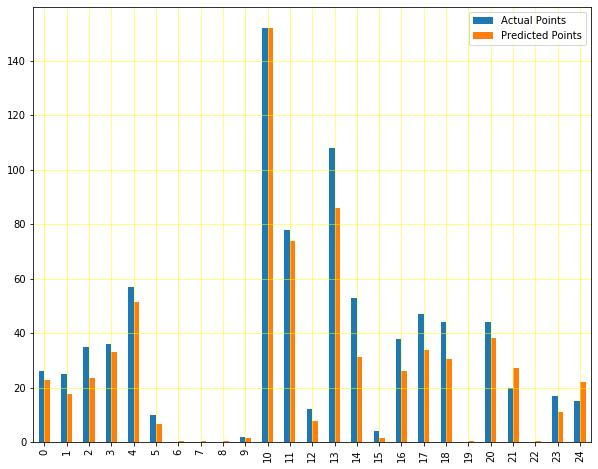

Text(0, 0.5, 'Predictions')

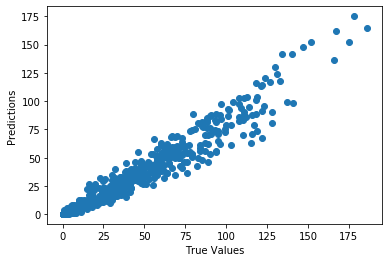

In [29]:
# test data on the sum of all the gws of 2019
f = "2019-20/players_raw_data.csv"
result_dataset = pd.read_csv(f,encoding="UTF-8")

# predict values using the below parameters
y = df1["total_points"].values
df_train, df_test, a_train, a_test = train_test_split(df, y, test_size=0.27224)
X_train = df1[["bonus","influence","threat","assists","goals_scored"]].values
y_train = df1["total_points"].values
X_test = result_dataset[["bonus","influence","threat","assists","goals_scored"]].values 
y_test = result_dataset["total_points"].values

# perform linear regression
regressor1 = LinearRegression()  
regressor1.fit(X_train, y_train)
y_pred = regressor1.predict(X_test)
result_dataset['ypred'] = y_pred
# print value of b in equation
print(regressor1.coef_)
#print(result_dataset.iloc[1,:])

# sort according to highest value of prediction and show top 50
sorteddf = result_dataset.sort_values('ypred',ascending = False)
display(sorteddf[0:50])
  

# print comparision between predicted and actual points
reg = pd.DataFrame({'Actual Points': y_test, 'Predicted Points': y_pred})
regh = reg.head(25)
regh.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='yellow')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")


[0.33158716 5.09122177 0.67503485]


,first_namesecond_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,saves,team,id,transfers_in,transfers_out,goals_conceded2,ypred
92,NickPope,0,0,128,2610,40,30.3,671.6,2,17,598,70.3,11,0,0,18.8,49,89,5,93,76370,13340,24.390244,112.987311
261,MartinDubravka,0,0,118,2610,41,0.0,847.8,0,7,578,84.9,9,0,0,1.8,51,116,13,262,8817,4624,23.809524,112.432756
365,BenFoster,0,0,111,2610,44,10.1,683.6,17,15,538,71.3,9,0,1,4.2,49,89,18,366,3201,24612,22.222222,105.505007
167,KasperSchmeichel,0,0,119,2610,28,10.0,696.4,0,6,552,70.7,10,0,2,14.3,54,81,9,168,5234,36307,34.482759,97.142974
13,BerndLeno,0,0,108,2520,36,0.0,777.8,0,9,560,77.6,7,0,2,5.6,50,104,1,14,6738,7070,27.027027,94.896092
130,VicenteGuaita,0,0,116,2430,28,0.0,660.8,0,16,522,66.0,9,0,1,2.1,50,89,7,131,3252,9875,34.482759,94.704449
410,Rui Pedrodos Santos Patrício,0,0,116,2610,34,0.0,636.0,0,8,516,63.8,8,0,0,9.9,52,77,20,411,29394,8130,28.571429,89.684391
467,DeanHenderson,0,1,122,2430,22,0.0,517.8,18,11,513,53.6,10,0,2,16.3,53,70,15,471,91716,15325,43.478261,89.445306
46,MathewRyan,0,0,102,2610,40,0.0,791.6,0,12,577,79.2,6,0,0,13.9,47,92,4,47,2718,53748,24.390244,88.525964
279,TimKrul,0,0,91,2430,45,0.0,776.0,0,10,510,77.6,5,0,4,2.6,46,95,14,280,6950,4475,21.739130,87.804678


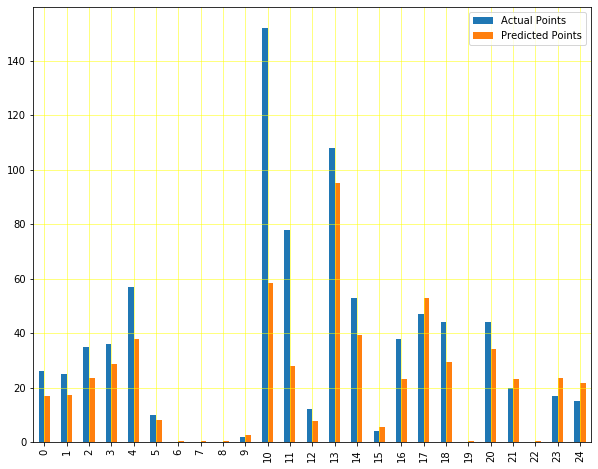

Text(0, 0.5, 'Predictions')

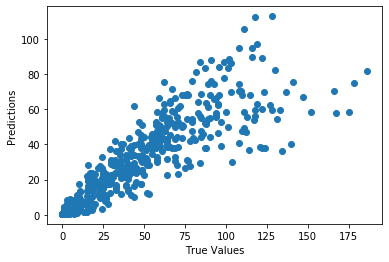

In [6]:
# test data on the sum of all the gws of 2019
# This is for goalkeepers only. The data for the other players who are not goalkeepers is not accurate.
f = "2019-20/players_raw_data.csv"
result_dataset2 = pd.read_csv(f,encoding="UTF-8")
# invert goals_conceded parameter and add weight to it
df1["goals_conceded2"] = 1000/(df1["goals_conceded"]+1)
result_dataset2["goals_conceded2"] = 1000/(result_dataset["goals_conceded"]+1)

# predict values using saves, clean_sheets and least goals conceded
X_train = df1[["saves","clean_sheets","goals_conceded"]].values
y_train = df1["total_points"].values

X_test = result_dataset[["saves","clean_sheets","goals_conceded"]].values 
y_test = result_dataset["total_points"].values

# perform linear regression
regressor2 = LinearRegression()  
regressor2.fit(X_train, y_train)
y_pred2 = regressor2.predict(X_test)
result_dataset2['ypred'] = y_pred2
print(regressor2.coef_)
#print(result_dataset.iloc[1,:])

# sort according to highest value of prediction
sorteddf2 = result_dataset.sort_values('ypred',ascending = False)
display(sorteddf2[0:50])



'''index = sorted(range(len(y_pred)), key=lambda k: y_pred[k], reverse=True)
player_ids = np.array(index)+1
player_scores = np.array(y_pred)
player_scores = player_scores[index]
print(player_ids,player_scores)'''  

# print comparision between predicted and actual points
reg = pd.DataFrame({'Actual Points': y_test, 'Predicted Points': y_pred2})
regh = reg.head(25)
regh.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='yellow')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


plt.scatter(y_test, y_pred2)
plt.xlabel("True Values")
plt.ylabel("Predictions")


In [13]:
'''
For GW27(getting the difficulty from the table below):
Chelsea(3.2) vs Spurs(3.85)
Burnley(1.7) vs Bournemouth(2.33)
Crystal Palace(1.7) vs Newcastle(2.49) 
Sheffield(2.3) vs Brighton(3.7) 
Southampton(2.4) vs Villa(3.6) 
Leicester(4.3) vs Man City(3.5) 
Man United(1.9) vs Watford(3.8) 
Wolves(1) vs Norwich(3.5) 
Arsenal(2.3) vs Everton(3.4) 
Liverpool(1.8) vs West Ham(5) 
'''
async with aiohttp.ClientSession() as session:
    fpl = FPL(session)
    fdr = await fpl.FDR()

fdr_table = PrettyTable()
fdr_table.field_names = ["Team", "All (H)", "All (A)", "GK (H)", "GK (A)", "DEF (H)", "DEF (A)","MID (H)", "MID (A)", "FWD (H)", "FWD (A)"]

for team, positions in fdr.items():
    row = [team]
    for difficulties in positions.values():
        for location in ["H", "A"]:
            if difficulties[location] == 5.0:
                row.append(Fore.RED + "5.0" + Fore.RESET)
            elif difficulties[location] == 1.0:
                row.append(Fore.GREEN + "1.0" + Fore.RESET)
            else:
                row.append(f"{difficulties[location]:.2f}")

    fdr_table.add_row(row)

fdr_table.align["Team"] = "l"
print(fdr_table)

+----------------+---------+---------+--------+--------+---------+---------+---------+---------+---------+---------+
| Team           | All (H) | All (A) | GK (H) | GK (A) | DEF (H) | DEF (A) | MID (H) | MID (A) | FWD (H) | FWD (A) |
+----------------+---------+---------+--------+--------+---------+---------+---------+---------+---------+---------+
| Norwich        |   1.0   |   2.18  |  2.54  |  3.40  |   1.0   |   2.69  |   2.89  |   2.91  |   1.49  |   1.08  |
| Bournemouth    |   1.70  |   2.12  |  3.18  |  3.32  |   2.24  |   2.77  |   1.20  |   2.16  |   3.27  |   2.07  |
| Chelsea        |   3.85  |   2.64  |  4.75  |  1.92  |   4.42  |   1.90  |   3.59  |   3.60  |   2.86  |   4.72  |
| Sheffield Utd  |   3.73  |   2.81  |  4.36  |  3.16  |   3.56  |   2.13  |   4.09  |   3.71  |   4.57  |   4.02  |
| Burnley        |   2.25  |   2.33  |  4.05  |  2.99  |   2.65  |   2.66  |   2.30  |   1.81  |   2.83  |   4.07  |
| Newcastle      |   1.70  |   1.92  |  3.30  |  1.20  |   2.55 

In [35]:
# giving the amount of transfers and fixture difficulty some importance so it gives an idea 
# about next gameweek but not so much that it skews our prediction 

result_dataset['fixture'] = 0
 
result_dataset["transfers_in2"] = (result_dataset["transfers_in"]/10000)/3
# setting fixture difficulty according to gw27
result_dataset.loc[result_dataset.team == 1,'fixture'] = 2.3
result_dataset.loc[result_dataset.team == 2,'fixture'] = 3.6
result_dataset.loc[result_dataset.team == 3,'fixture'] = 2.3
result_dataset.loc[result_dataset.team == 4,'fixture'] = 3.7
result_dataset.loc[result_dataset.team == 5,'fixture'] = 1.7
result_dataset.loc[result_dataset.team == 6,'fixture'] = 3.2
result_dataset.loc[result_dataset.team == 7,'fixture'] = 1.7
result_dataset.loc[result_dataset.team == 8,'fixture'] = 3.4
result_dataset.loc[result_dataset.team == 9,'fixture'] = 4.3
result_dataset.loc[result_dataset.team == 10,'fixture'] = 1.0
result_dataset.loc[result_dataset.team == 11,'fixture'] = 4.1
result_dataset.loc[result_dataset.team == 12,'fixture'] = 1.9
result_dataset.loc[result_dataset.team == 13,'fixture'] = 2.4
result_dataset.loc[result_dataset.team == 14,'fixture'] = 3.5
result_dataset.loc[result_dataset.team == 15,'fixture'] = 2.3
result_dataset.loc[result_dataset.team == 16,'fixture'] = 2.4
result_dataset.loc[result_dataset.team == 17,'fixture'] = 3.8
result_dataset.loc[result_dataset.team == 18,'fixture'] = 3.8
result_dataset.loc[result_dataset.team == 19,'fixture'] = 5.0
result_dataset.loc[result_dataset.team == 20,'fixture'] = 1.0
result_dataset['ypred2'] = result_dataset['ypred'] - (result_dataset['fixture']*2) + result_dataset["transfers_in2"]
sorteddf3 = result_dataset.sort_values('ypred2',ascending = False)
display(sorteddf3[0:50])
  
    

,first_namesecond_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,saves,team,id,transfers_in,transfers_out,ypred,fixture,transfers_in2,ypred2
214,KevinDe Bruyne,8,18,178,2148,20,1457.9,955.4,745,23,715,316.0,12,0,2,45.7,106,0,11,215,85541,83117,175.077535,4.1,2.851367,169.728901
190,MohamedSalah,16,6,186,2243,15,637.9,834.4,1618,23,541,308.9,14,0,1,43.6,127,0,10,191,76200,82417,164.482380,1.0,2.540000,165.022380
408,RaúlJiménez,13,6,147,2458,31,560.6,723.4,1364,23,520,264.2,9,0,3,32.8,81,0,20,409,333092,53536,147.936703,1.0,11.103067,157.039769
191,SadioMané,14,9,175,2077,18,580.8,791.6,970,22,520,234.4,9,0,2,25.1,125,0,10,192,201713,33953,151.879810,1.0,6.723767,156.603577
165,JamieVardy,19,6,167,2222,25,228.9,817.6,958,27,615,199.7,8,0,2,29.8,97,0,9,166,47590,263324,161.637838,4.3,1.586333,154.624172
10,Pierre-EmerickAubameyang,17,3,152,2303,33,383.2,742.8,985,29,601,210.9,7,1,3,27.5,111,0,1,11,126811,28161,152.070934,2.3,4.227033,151.697968
312,DannyIngs,15,1,140,1993,36,268.9,678.0,1135,28,513,208.1,3,0,2,29.2,71,0,16,313,304497,28434,141.917084,2.4,10.149900,147.266984
232,MarcusRashford,14,5,134,1876,23,379.4,677.0,965,26,494,202.3,4,0,2,9.5,88,0,12,233,792,40325,141.598511,1.9,0.026400,137.824911
181,TrentAlexander-Arnold,2,14,166,2549,21,1169.3,822.2,353,18,727,234.5,11,0,4,44.6,78,0,10,182,45309,15226,136.442474,1.0,1.510300,135.952774
186,RobertoFirmino,8,8,130,2410,16,535.2,626.8,1392,18,500,255.6,14,0,0,14.9,95,0,10,187,71389,91631,130.388303,1.0,2.379633,130.767936
